In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('house.csv',parse_dates=['date'])
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Getting the basic understanding of the data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [4]:
df.isna().sum()

#theres no null value in this d

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe()

## from this describe table we can assume there's going to be outliers in some of the colum by looking from the median and max valaues in certain columns
## the average house price in king county is around 540000 
# the maximum house price in king county is 7.7 million which pretty far from the mean and median
# there's house with no bedroom and house with no bath room which is kind of weird we will investigate this further


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Outliers and handling missing / random value 


In [6]:
df.isna().sum()

# since there is no missing value in the columns we will not dropping or filling missing value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
len(df.columns)

21

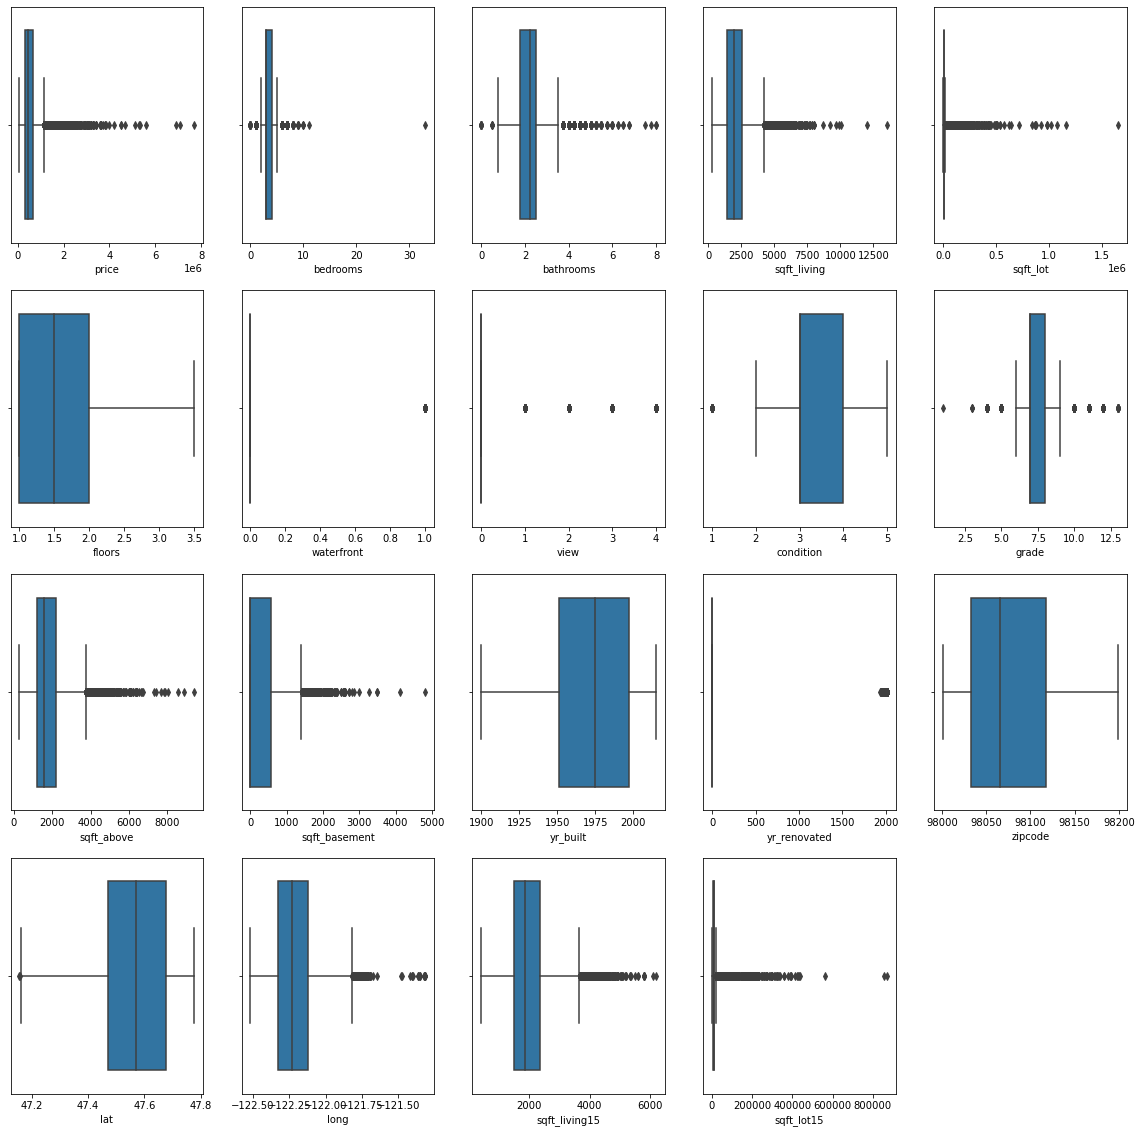

In [8]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

df_describe = df.drop(columns = ['id', 'date'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

# from this box plot below we can see there are outliers in many of the columns and scaling will be useful to handle all the outliers 
# 

In [9]:
### Checking the value that's unsual 
# bedroom and bathroom that's 0 

df[df['bedrooms'] < 1]

# there are rows that does not have bedrooms, which is kind of weird for a house
# i will treat this like a null value and fill it with median numbers of bedroom in a house 
# same goes to the bathrooms with 0 values as well 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [10]:
df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

In [11]:
df[df['bedrooms'] < 1]

df.to_csv('data_cleaned.csv')


In [12]:
df[df['bathrooms'] == 0]

# now both of the bedrooms and bathrooms has no null value 
# the value was replaced with median not mean because there's outliers in both columns
# there are some float values in the number of the bathrooms, and according to this
# it's normal not to have a full bathroom size
# - source :
#  https://illinado.com/what-is-a-quarter-bath/#:~:text=Well%2C%20a%20quarter%20bath%20is,it%20only%20has%20a%20toilet.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


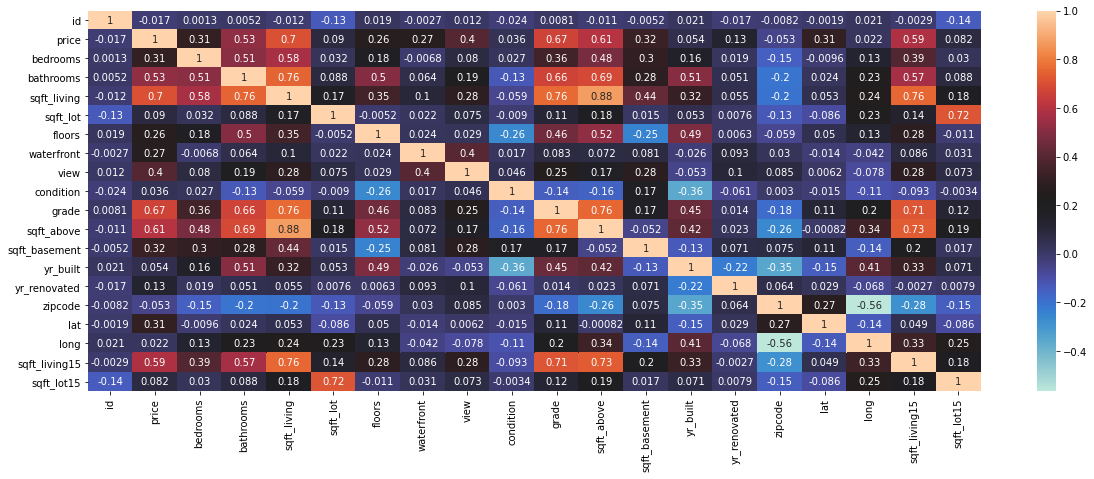

In [13]:
plt.figure(figsize = (20, 7) )

sns.heatmap(df.corr(), annot = True, cmap = 'icefire')

# so majority of  columns  has positve correlation with price columns except zipcode 
# correlation column to price correlation ordered by desc:
#     - sqft_living

so majority of  columns  has positve correlation with price columns except zipcode 


correlation column to price correlation ordered by desc:
- sqft_living
- grade
- sqft_above
- sqft_living15
- bathrooms
- bathrooms
- view
- sqft_basement
- bedrooms
- lat


this column will be all the feature for machine learning since it has correlation above 0.3 to price

In [14]:
correlation = df.corr()
correlation['price'].sort_values(ascending = False)[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525714
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [16]:
X =df.drop(columns = ['id','price','date'])
# y = np.log(df['price'])
y = np.log(df['price'])

## Model Building 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = .2, random_state = 42)

# train test split before the test 

# Base Model


### Linear Regression

In [18]:
linreg = LinearRegression()

In [19]:
linreg.fit(X_train, y_train)

#model training 

LinearRegression()

In [20]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
linreg.coef_

array([-1.14093201e-02,  7.34842500e-02,  9.67608347e-05,  3.97250129e-07,
        7.49285121e-02,  3.74443055e-01,  6.19963857e-02,  6.10387404e-02,
        1.56644286e-01,  4.09769960e-05,  5.57838387e-05, -3.50796046e-03,
        3.56857639e-05, -6.22468370e-04,  1.40163016e+00, -1.35945262e-01,
        9.80299358e-05, -1.84270709e-07])

In [22]:
y_pred =  linreg.predict(X_test)

In [81]:
linreg_train = linreg.score(X_train, y_train)

In [24]:
linreg.score(X_test, y_test)

0.7710344819282888

In [25]:
r2_linreg = linreg.score(X_test, y_test)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

In [26]:
print('Hasil Evaluation Matrix LinReg : ')
print("")
print(f'MAE: {MAE_linreg}')
print(f'MSE:{MSE_linreg}')
print(f"RMSE : {RMSE_linreg}")
print(f"R2 : {r2_linreg}")

Hasil Evaluation Matrix LinReg : 

MAE: 0.19642970996388065
MSE:0.06526250812737575
RMSE : 0.25546527773334626
R2 : 0.7710344819282888


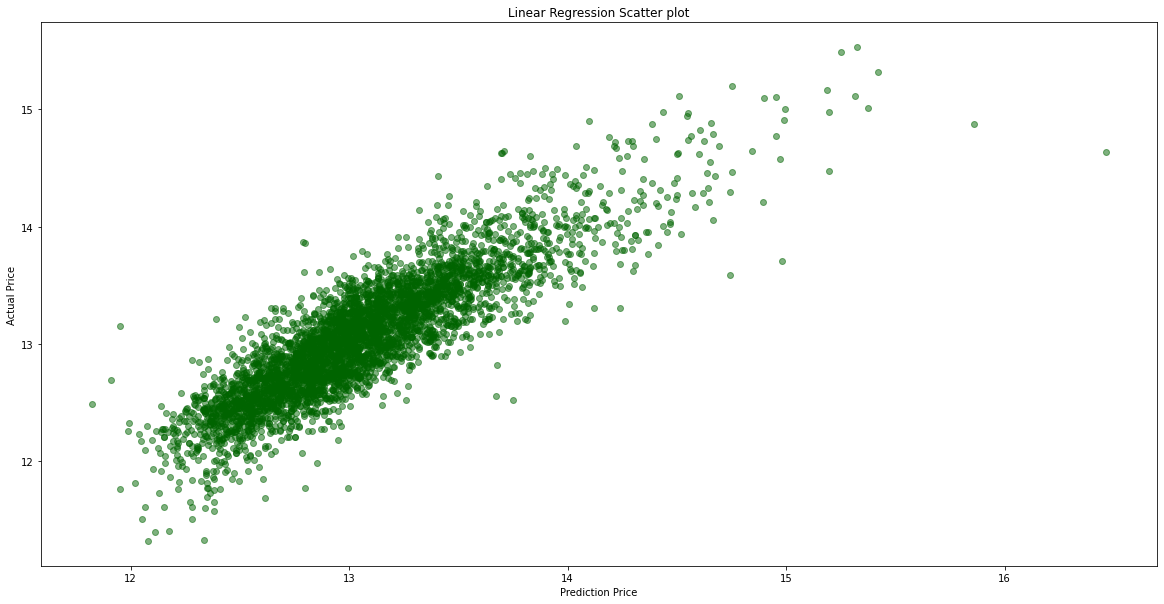

In [27]:
plt.figure(figsize = (20, 10 ))
plt.scatter(y_pred, y_test, color= 'darkgreen', alpha = 0.5)
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Scatter plot')

plt.show()

### Ridge Regression

In [28]:
ridge = Ridge(alpha = 1)

In [29]:
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [30]:
y_ridge_prediction = ridge.predict(X_test)

In [99]:
ridge_train =  ridge.score(X_train, y_train)

In [32]:
r2_ridge = ridge.score(X_test, y_test)
MAE_ridge = mean_absolute_error(y_test, y_ridge_prediction)
MSE_ridge = mean_squared_error(y_test, y_ridge_prediction)
RMSE_ridge = np.sqrt(MSE_ridge)

In [33]:
print('Hasil Evaluation Matrix Ridge : ')
print("")
print(f'MAE: {MAE_ridge}')
print(f'MSE:{MSE_ridge}')
print(f"RMSE : {RMSE_ridge}")
print(f"R2 : {r2_ridge}")

Hasil Evaluation Matrix Ridge : 

MAE: 0.19642466799619984
MSE:0.06526289053227832
RMSE : 0.2554660261801524
R2 : 0.7710331403075155


### Lasso Regression 

In [34]:
lasso = Lasso()

In [35]:
lasso.fit(X_train, y_train)

Lasso()

In [36]:
y_lasso_pred = lasso.predict(X_test)

In [104]:
lasso_train =  lasso.score(X_train, y_train)

In [38]:
r2_lasso = lasso.score(X_test, y_test)
MAE_lasso = mean_absolute_error(y_test, y_lasso_pred)
MSE_lasso = mean_squared_error(y_test, y_lasso_pred)
RMSE_lasso = np.sqrt(MSE_lasso)

In [39]:
print('Hasil Evaluation Matrix Lasso : ')
print("")
print(f'MAE: {MAE_lasso}')
print(f'MSE:{MSE_lasso}')
print(f"RMSE : {RMSE_lasso}")
print(f"R2 : {r2_lasso}")

Hasil Evaluation Matrix Lasso : 

MAE: 0.2917027059839656
MSE:0.12980087782293231
RMSE : 0.3602788889498416
R2 : 0.544609514870546


### Random Forest Regressor

In [40]:
RF = RandomForestRegressor()

In [41]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_base_RF = RF.predict(X_test)

In [113]:
RF_train =  RF.score(X_train,y_train)

In [44]:
r2_RF = r2_score(y_test, y_base_RF)
MAE_RF = mean_absolute_error(y_test, y_base_RF)
MSE_RF = mean_squared_error(y_test, y_base_RF)
RMSE_RF = np.sqrt(MSE_RF)

In [45]:
print('Hasil Evaluation Matrix Random Forest : ')
print("")
print(f'MAE: {MAE_RF}')
print(f'MSE:{MSE_RF}')
print(f"RMSE : {RMSE_RF}")
print(f"R2 : {r2_RF}")

Hasil Evaluation Matrix Random Forest : 

MAE: 0.1258087507740151
MSE:0.03144363920427145
RMSE : 0.17732354385211077
R2 : 0.8896838422695251


### Decision Tree Base Model

In [228]:
base_DT = DecisionTreeRegressor()

In [229]:
base_DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [231]:
DT_train =  base_DT.score(X_train,y_train)

In [232]:
y_base_DT = base_DT.predict(X_test)

In [234]:
r2_base_DT =  r2_score(y_base_DT, y_test)
MAE_DT = mean_absolute_error(y_test, y_base_DT)
MSE_DT = mean_squared_error(y_test, y_base_DT)
RMSE_DT = np.sqrt(MSE_DT)

In [235]:
print('Hasil Evaluation Matrix Decision Tree : ')
print("")
print(f'MAE: {MAE_DT}')
print(f'MSE:{MSE_DT}')
print(f"RMSE : {RMSE_DT}")
print(f"R2 : {r2_base_DT}")

Hasil Evaluation Matrix Decision Tree : 

MAE: 0.17825038913549582
MSE:0.06271142181562804
RMSE : 0.2504224866413319
R2 : 0.7824636432639249


### KNN

In [46]:
knn = KNeighborsRegressor()

In [47]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [48]:
knn_predict = knn.predict(X_test)

In [108]:
knn_train =  knn.score(X_train,y_train)

In [50]:
r2_knn = r2_knn = r2_score(y_test, knn_predict)
MAE_knn = mean_absolute_error(y_test, knn_predict)
MSE_knn = mean_squared_error(y_test, knn_predict)
RMSE_knn = np.sqrt(MSE_knn)

In [51]:
print('Hasil Evaluation Matrix KNearestNeighbors : ')
print("")
print(f'MAE: {MAE_knn}')
print(f'MSE:{MSE_knn}')
print(f"RMSE : {RMSE_knn}")
print(f"R2 : {r2_knn}")

Hasil Evaluation Matrix KNearestNeighbors : 

MAE: 0.29344077907885924
MSE:0.14143307497801885
RMSE : 0.3760758899185361
R2 : 0.5037993755677712


### Polynomial 

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
X =df.drop(columns = ['id','date','price'])
# y = np.log(df['price'])
y = np.log(df['price'])

In [54]:
poli_price = PolynomialFeatures(degree = 2, include_bias=False, interaction_only=True)
poli_house_price = poli_price.fit_transform(X)

In [55]:
poli_house_price = pd.DataFrame(data = poli_house_price, columns = np.arange(171))

In [56]:
df_house_price_all = pd.concat([X,poli_house_price], axis = 1)
df_house_price_all.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,3.00,3540.0,16950.0,3.0,0.0,0.0,9.0,21.0,3540.0,0.0,5865.0,0.0,294534.0,142.5336,-366.771,4020.0,16950.0,1180.0,5650.0,1.0,0.0,0.0,3.00,7.00,1180.0,0.0,1955.00,0.00,98178.00,47.51120,-122.25700,1340.0,5650.00,6667000.0,1180.0,0.0,0.0,3540.0,8260.0,1392400.0,0.0,2306900.0,0.0,115850040.0,56063.216,-144263.26,1581200.0,6667000.0,5650.0,0.0,0.0,16950.0,39550.0,6667000.0,0.0,11045750.0,0.0,554705700.0,268438.280,-690752.050,7571000.0,31922500.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,21.0,3540.0,0.0,5865.0,0.0,294534.0,142.5336,-366.771,4020.0,16950.0,8260.0,0.0,13685.0,0.0,687246.0,332.5784,-855.799,9380.0,39550.0,0.0,2306900.0,0.0,115850040.0,56063.216,-144263.26,1581200.0,6667000.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,0.0,191937990.0,92884.3960,-239012.435,2619700.0,11045750.0,0.0,0.000,-0.000,0.0,0.0,4.664555e+06,-1.200295e+07,131558520.0,554705700.0,-5808.576778,63665.008,268438.2800,-163824.38,-690752.050,7571000.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,6.75,7710.0,21726.0,6.0,0.0,0.0,9.0,21.0,6510.0,1200.0,5853.0,5973.0,294375.0,143.1630,-366.957,5070.0,22917.0,5782.5,16294.5,4.5,0.0,0.0,6.75,15.75,4882.5,900.0,4389.75,4479.75,220781.25,107.37225,-275.21775,3802.5,17187.75,18611940.0,5140.0,0.0,0.0,7710.0,17990.0,5576900.0,1028000.0,5014070.0,5116870.0,252181250.0,122642.970,-314359.83,4343300.0,19632230.0,14484.0,0.0,0.0,21726.0,50694.0,15715140.0,2896800.0,14129142.0,14418822.0,710621250.0,345595.482,-885834.198,12238980.0,55321638.0,0.0,0.0,6.0,14.0,4340.0,800.0,3902.0,3982.0,196250.0,95.4420,-244.638,3380.0,15278.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,21.0,6510.0,1200.0,5853.0,5973.0,294375.0,143.1630,-366.957,5070.0,22917.0,15190.0,2800.0,13657.0,13937.0,686875.0,334.0470,-856.233,11830.0,53473.0,868000.0,4233670.0,4320470.0,212931250.0,103554.570,-265432.23,3667300.0,16576630.0,780400.0,796400.0,39250000.0,19088.400,-48927.60,676000.0,3055600.0,3884441.0,191441875.0,93103.6710,-238644.369,3297190.0,14903689.0,195366875.0,95012.511,-243537.129,3364790.0,15209249.0,4.682623e+06,-1.200255e+07,165831250.0,749576875.0,-5837.184999,80648.490,364540.7190,-206719.11,-934394.841,12909910.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2.00,1540.0,20000.0,2.0,0.0,0.0,6.0,12.0,1540.0,0.0,3866.0,0.0,196056.0,95.4758,-244.466,5440.0,16124.0,770.0,10000.0,1.0,0.0,0.0,3.00,6.00,770.0,0.0,1933.00,0.00,98028.00,47.73790,-122.23300,2720.0,8062.00,7700000.0,770.0,0.0,0.0,2310.0,4620.0,592900.0,0.0,1488410.0,0.0,75481560.0,36758.183,-94119.41,2094400.0,6207740.0,10000.0,0.0,0.0,30000.0,60000.0,7700000.0,0.0,19330000.0,0.0,980280000.0,477379.000,-1222330.000,27200000.0,8

In [57]:
### splitting polinomial_data

X_train_poli, X_test_poli, y_train_poli, y_test_poli = train_test_split(df_house_price_all, y , test_size = 0.2, random_state = 42)

In [58]:
linreg_poli = LinearRegression()

In [59]:
linreg_poli.fit(X_train_poli, y_train_poli)

LinearRegression()

In [60]:
poli_test = linreg_poli.predict(X_test_poli)

In [121]:
linreg_poli_train = linreg_poli.score(X_train_poli, y_train_poli)
linreg_poli_train

0.8073577376985632

In [61]:
r2_poli =  linreg_poli.score(X_test_poli, y_test_poli)
MAE_poli = mean_absolute_error(y_test_poli, poli_test)
MSE_poli = mean_squared_error(y_test_poli, poli_test)
RMSE_poli = np.sqrt(MSE_poli)

In [62]:
print('Hasil Evaluation Matrix Linreg poli degree 2 : ')
print("")
print(f'MAE: {MAE_poli}')
print(f'MSE:{MSE_poli}')
print(f"RMSE : {RMSE_poli}")
print(f"R2 : {r2_poli}")

Hasil Evaluation Matrix Linreg poli degree 2 : 

MAE: 0.18354564036929202
MSE:0.05822905829499
RMSE : 0.24130697937479967
R2 : 0.7957104793870514


### Ridge Regression Poly Degree 2


In [90]:
ridge_poli = Ridge() 

In [91]:
ridge_poli.fit(X_train_poli, y_train_poli)

Ridge()

In [92]:
ridge_predict_poli = ridge_poli.predict(X_test_poli)

In [93]:
ridge_r2_poli =  ridge_poli.score(X_test_poli, y_test_poli)
ridge_MAE_poli = mean_absolute_error(y_test_poli, ridge_predict_poli)
ridge_MSE_poli = mean_squared_error(y_test_poli, ridge_predict_poli)
ridge_RMSE_poli = np.sqrt(ridge_MSE_poli)

In [126]:
ridge_poli_train =  ridge_poli.score(X_train_poli, y_train_poli)

In [95]:
print('Hasil Evaluation Matrix Ridge poli degree 2 : ')
print("")
print(f'MAE: {ridge_MAE_poli}')
print(f'MSE:{ridge_MSE_poli}')
print(f"RMSE : {ridge_RMSE_poli}")
print(f"R2 : {ridge_r2_poli}")

Hasil Evaluation Matrix Ridge poli degree 2 : 

MAE: 0.18428714269782775
MSE:0.05884317175989099
RMSE : 0.24257611539451074
R2 : 0.7935559374964543


In [237]:
data = {'LinReg': [r2_linreg,MAE_linreg,MSE_linreg,RMSE_linreg],
        'Linreg Train':[linreg_train, np.nan, np.nan, np.nan],
       'Ridge':[r2_ridge, MAE_ridge, MSE_ridge, RMSE_ridge],
        'Ridge Train':[ridge_train, np.nan, np.nan, np.nan],
       'Lasso':[r2_lasso, MAE_lasso, MSE_lasso, RMSE_lasso],
        'Lasso Train':[lasso_train, np.nan, np.nan, np.nan],
        'KNN':[r2_knn, MAE_knn, MSE_knn, RMSE_knn],
        'KNN_train':[knn_train, np.nan, np.nan, np.nan],
        'Decision Tree':[r2_base_DT,MAE_DT,MSE_DT,RMSE_DT],
        'Decision Tree_train':[DT_train, np.nan, np.nan, np.nan],
        'Random_Forest':[r2_RF, MAE_RF, MSE_RF, RMSE_RF],
        'Random_Forest_Train':[RF_train,np.nan,np.nan,np.nan],
       'Linreg_poly2': [r2_poli,MAE_poli,MSE_poli,RMSE_poli],
        'Linreg_poly2_train':[linreg_poli_train, np.nan, np.nan, np.nan],
       'Ridge_poly2':[ridge_r2_poli,ridge_MAE_poli,ridge_MSE_poli,ridge_RMSE_poli],
       'Ridge_poly2_train':[ridge_poli_train, np.nan, np.nan, np.nan]}

## Base Model and Polynomial

In [238]:
df_score =  pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])

In [240]:
df_score

# The overall model seems to be in the sweet spot except for Random forest, Decision Tree, and KNN model are overfitting 
# we are going to Tune this in hyper parameter tuning 

,LinReg,Linreg Train,Ridge,Ridge Train,Lasso,Lasso Train,KNN,KNN_train,Decision Tree,Decision Tree_train,Random_Forest,Random_Forest_Train,Linreg_poly2,Linreg_poly2_train,Ridge_poly2,Ridge_poly2_train
R2,0.771034,0.770161,0.771033,0.770159,0.544610,0.536981,0.503799,0.674805,0.782464,0.996922,0.889684,0.981833,0.795710,0.807358,0.793556,0.804771
MAE,0.196430,NaN,0.196425,NaN,0.291703,NaN,0.293441,NaN,0.178250,NaN,0.125809,NaN,0.183546,NaN,0.184287,NaN
MSE,0.065263,NaN,0.065263,NaN,0.129801,NaN,0.141433,NaN,0.062711,NaN,0.031444,NaN,0.058229,NaN,0.058843,NaN
RMSE,0.255465,NaN,0.255466,NaN,0.360279,NaN,0.376076,NaN,0.250422,NaN,0.177324,NaN,0.241307,NaN,0.242576,NaN


## Hyper Parameter Tuning

#### Linreg Hyper Parameter Tuning

In [138]:
X =df.drop(columns = ['id','price','date'])
# y = np.log(df['price'])
y = np.log(df['price'])

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = .2, random_state = 42)

# train test split before the test 

In [140]:
Linreg_tuned = LinearRegression()
param_linreg = {'fit_intercept':[True, False],
               'normalize':[False, True],
               'copy_X':[True, False]
               }

In [141]:
model_linreg_tuned = GridSearchCV(estimator = Linreg_tuned, param_grid=param_linreg, n_jobs = -1, cv=5, verbose =1)

In [142]:
model_linreg_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [False, True]},
             verbose=1)

In [143]:
model_linreg_tuned.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': False}

In [148]:
linreg_tuned_train =  model_linreg_tuned.best_score_
linreg_tuned_train

0.7692234048461326

In [145]:
linreg_tuned = model_linreg_tuned.best_estimator_

In [146]:
y_linreg_tuned =  linreg_tuned.predict(X_test)

In [150]:
linreg_r2_tuned = r2_score(y_test, y_linreg_tuned)
MAE_linreg_tuned = mean_absolute_error(y_test, y_linreg_tuned)
MSE_linreg_tuned = mean_squared_error(y_test, y_linreg_tuned)
RMSE_linreg_tuned = np.sqrt(MSE_linreg_tuned)

#### Ridge Hyper Parameter Tuning

In [169]:
ridge_tuning = Ridge()
param_ridge = {'alpha':[1,0.5,0.1, 5, 15, 30, 60],
               'fit_intercept':[True, False],
              'normalize': [False, True],
              'copy_X':[True, False],
              'max_iter':[None, 10, 100, 1000],
              'tol':[0.001, 0.005, 0.01]}

In [170]:
model_ridge_tuned = GridSearchCV(estimator = ridge_tuning, param_grid=param_ridge, n_jobs = -1, cv=5, verbose =1)

In [171]:
model_ridge_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:   17.4s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.5, 0.1, 5, 15, 30, 60],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [None, 10, 100, 1000],
                         'normalize': [False, True],
                         'tol': [0.001, 0.005, 0.01]},
             verbose=1)

In [192]:
ridge_tuned_train = model_ridge_tuned.best_score_
ridge_tuned_train

0.7692235136512398

In [175]:
ridge_tuned = model_ridge_tuned.best_estimator_

In [195]:
model_ridge_tuned.best_params_

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': None,
 'normalize': False,
 'tol': 0.001}

In [176]:
y_ridge_tuned =  ridge_tuned.predict(X_test)

In [202]:
r2_tuned_ridge = r2_score(y_test, y_ridge_tuned)
MAE_ridge_tuned = mean_absolute_error(y_test, y_ridge_tuned)
MSE_ridge_tuned = mean_squared_error(y_test, y_ridge_tuned)
RMSE_ridge_tuned = np.sqrt(MSE_ridge_tuned)
r2_tuned_ridge

0.7709933572232526

#### Lasso Hyperparameter Tuning

In [207]:
lasso_tuning = Lasso()
param_lasso = {'alpha':[1,0.5,0.1, 5, 15, 30, 60],
               'fit_intercept':[True, False],
              'normalize': [False, True],
              'copy_X':[True, False],
              'max_iter':[1000, 2000, 5000],
              'tol':[0.0001, 0.005, 0.01]
              }

In [208]:
model_lasso_tuned = GridSearchCV(estimator = lasso_tuning, param_grid=param_lasso, n_jobs = -1, cv=5, verbose =1)

In [209]:
model_lasso_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 581 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1604 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1, 0.5, 0.1, 5, 15, 30, 60],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [False, True],
                         'tol': [0.0001, 0.005, 0.01]},
             verbose=1)

In [210]:
lasso_tuned_train = model_lasso_tuned.best_score_
lasso_tuned_train

0.5454165812987104

In [211]:
lasso_tuned = model_lasso_tuned.best_estimator_

In [212]:
y_lasso_tuned = lasso_tuned.predict(X_test)

In [214]:
r2_tuned_lasso = r2_score(y_test, y_lasso_tuned)
MAE_lasso_tuned = mean_absolute_error(y_test, y_lasso_tuned)
MSE_lasso_tuned = mean_squared_error(y_test, y_lasso_tuned)
RMSE_lasso_tuned = np.sqrt(MSE_lasso_tuned)


0.552615238112205

#### KNN Hyperparameter Tuning

In [217]:
KNN_tuning = KNeighborsRegressor()
param_KNN = {'n_neighbors' :[5, 11, 15, 21, 31,3, 19 ],
              'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
            'p':[2, 1]}

In [218]:
model_KNN_tuned = GridSearchCV(estimator = KNN_tuning, param_grid=param_KNN, n_jobs = -1, cv=5, verbose =1)

In [219]:
model_KNN_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 11, 15, 21, 31], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [220]:
KNN_tuned_train = model_KNN_tuned.best_score_
KNN_tuned_train

0.5637338089083308

In [222]:
KNN_tuned = model_KNN_tuned.best_estimator_

In [224]:
y_KNN_tuned = KNN_tuned.predict(X_test)

In [278]:
r2_KNN_tuned = r2_score(y_test, y_KNN_tuned)
MAE_KNN_tuned = mean_absolute_error(y_test, y_KNN_tuned)
MSE_KNN_tuned = mean_squared_error(y_test, y_KNN_tuned)
RMSE_KNN_tuned = np.sqrt(MSE_KNN_tuned)

r2_KNN_tuned

0.5746345811784812

#### Decision Tree 

In [245]:
DT_tuning = DecisionTreeRegressor()
param_DT = {'max_depth':[None, 5, 9, 21,31 ],
            'min_samples_split':[2, 5, 9, 13],
            'min_samples_leaf':[1, 2, 5, 10],
            'max_features':[None,0.2,0.5,0.8]}

In [246]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid=param_DT, n_jobs = -1, cv=5, verbose =1)

In [247]:
model_DT_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   44.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 9, 21, 31],
                         'max_features': [None, 0.2, 0.5, 0.8],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 9, 13]},
             verbose=1)

In [250]:
DT_tuned_train =  model_DT_tuned.best_score_
DT_tuned_train

0.8283130538689365

In [252]:
model_DT_tuned = model_DT_tuned.best_estimator_

In [253]:
y_DT_tuned = model_DT_tuned.predict(X_test)

In [255]:
r2_tuned_DT =  r2_score(y_test, y_DT_tuned)
MAE_tuned_DT = mean_absolute_error(y_test, y_DT_tuned)
MSE_tuned_DT = mean_squared_error(y_test,y_DT_tuned)
RMSE_tuned_DT = np.sqrt(MSE_tuned_DT)
r2_tuned_DT

0.8392556644425713

#### Random Forest Hyper Parameter Tuning

In [264]:
RF_tuning = RandomForestRegressor()
param_RF = {'max_depth':[None, 5, 9],
            'min_samples_split':[2, 5, 9],
            'min_samples_leaf':[1, 5, 10],
            'max_features':[None,0.2,0.5],
           'n_estimators':[100, 200, 450]}

In [267]:
model_RF_tuned = GridSearchCV(estimator = RF_tuning, param_grid = param_RF, n_jobs = -1, cv=3, verbose =1)

In [268]:
model_RF_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 18.9min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 9],
                         'max_features': [None, 0.2, 0.5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 9],
                         'n_estimators': [100, 200, 450]},
             verbose=1)

In [270]:
RF_tuned_train = model_RF_tuned.best_score_
RF_tuned_train

0.8859376389644132

In [271]:
RF_tuned = model_RF_tuned.best_estimator_

In [272]:
y_RF_tuned =  RF_tuned.predict(X_test)

In [279]:
r2_tuned_RF = r2_score(y_test, y_RF_tuned)
MAE_RF_tuned = mean_absolute_error(y_test, y_RF_tuned)
MSE_RF_tuned = mean_squared_error(y_test, y_RF_tuned)
RMSE_RF_tuned = np.sqrt(MSE_RF_tuned)

r2_tuned_RF

0.8927891241294054

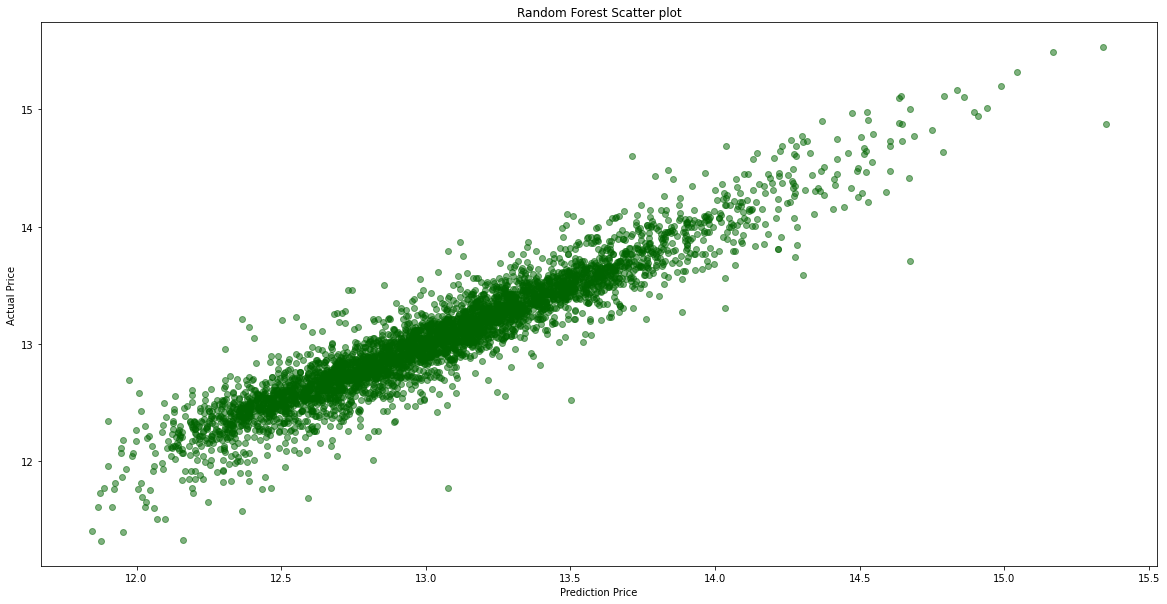

In [275]:
plt.figure(figsize = (20, 10 ))
plt.scatter(y_RF_tuned, y_test, color= 'darkgreen', alpha = 0.5)
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Scatter plot')

plt.show()

In [289]:
data2 = {'LinReg Tuned': [linreg_r2_tuned,MAE_linreg_tuned,MSE_linreg_tuned,RMSE_linreg_tuned],
        'Linreg Train Tuned':[linreg_tuned_train, np.nan, np.nan, np.nan],
       'Ridge Tuned':[r2_tuned_ridge, MAE_ridge_tuned, MSE_ridge_tuned, RMSE_ridge_tuned],
        'Ridge Train Tuned':[ridge_tuned_train, np.nan, np.nan, np.nan],
       'Lasso Tuned':[r2_tuned_lasso, MAE_lasso_tuned, MSE_lasso_tuned, RMSE_lasso_tuned],
        'Lasso Train Tuned':[lasso_tuned_train, np.nan, np.nan, np.nan],
        'KNN Tuned':[r2_KNN_tuned, MAE_KNN_tuned, MSE_KNN_tuned, RMSE_KNN_tuned],
        'KNN train Tuned':[KNN_tuned_train, np.nan, np.nan, np.nan],
        'Decision Tree Tuned':[r2_tuned_DT,MAE_tuned_DT,MSE_tuned_DT,RMSE_tuned_DT],
        'Decision Tree Train Tuned':[DT_tuned_train, np.nan, np.nan, np.nan],
        'Random Forest Tuned':[r2_tuned_RF, MAE_RF_tuned, MSE_RF_tuned, RMSE_RF_tuned],
        'Random Forest Train Tuned':[RF_tuned_train,np.nan,np.nan,np.nan]}

### Evaluation Matrix Before Tuning

In [290]:
df_score

,LinReg,Linreg Train,Ridge,Ridge Train,Lasso,Lasso Train,KNN,KNN_train,Decision Tree,Decision Tree_train,Random_Forest,Random_Forest_Train,Linreg_poly2,Linreg_poly2_train,Ridge_poly2,Ridge_poly2_train
R2,0.771034,0.770161,0.771033,0.770159,0.544610,0.536981,0.503799,0.674805,0.782464,0.996922,0.889684,0.981833,0.795710,0.807358,0.793556,0.804771
MAE,0.196430,NaN,0.196425,NaN,0.291703,NaN,0.293441,NaN,0.178250,NaN,0.125809,NaN,0.183546,NaN,0.184287,NaN
MSE,0.065263,NaN,0.065263,NaN,0.129801,NaN,0.141433,NaN,0.062711,NaN,0.031444,NaN,0.058229,NaN,0.058843,NaN
RMSE,0.255465,NaN,0.255466,NaN,0.360279,NaN,0.376076,NaN,0.250422,NaN,0.177324,NaN,0.241307,NaN,0.242576,NaN


### Evaluation Matrix After Tuning

In [291]:
df_score_tuned =  pd.DataFrame(data = data2, index = ['R2', 'MAE', 'MSE', 'RMSE'])
df_score_tuned

,LinReg Tuned,Linreg Train Tuned,Ridge Tuned,Ridge Train Tuned,Lasso Tuned,Lasso Train Tuned,KNN Tuned,KNN train Tuned,Decision Tree Tuned,Decision Tree Train Tuned,Random Forest Tuned,Random Forest Train Tuned
R2,0.770993,0.769223,0.770993,0.769224,0.552615,0.545417,0.574635,0.563734,0.839256,0.828313,0.892789,0.885938
MAE,0.196464,NaN,0.196464,NaN,0.287632,NaN,0.270778,NaN,0.154833,NaN,0.124539,NaN
MSE,0.065274,NaN,0.065274,NaN,0.127519,NaN,0.121243,NaN,0.045817,NaN,0.030559,NaN
RMSE,0.255488,NaN,0.255488,NaN,0.357098,NaN,0.348199,NaN,0.214050,NaN,0.174810,NaN


## Conclusion :

- Random Forest with HyperParameter Tuning has the Higest evaluation matrix to predict house prices in King County with the accuracy of 89 %